---
title: "Gapminder Data Visualization"
format: 
  html:
    theme: cosmo
---

# Lab 1
## Charles Annis
# Task 1




## 1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
Aesthetics:
Color is being used to identify each of the four regions. Bubble size is used to identify the population of the country. Each bubble represents a country. The year for this data is 2010.


Variables mapped to each aesthetic:
x = 'income': The variable income from the dataset is mapped to the x-axis.
y = 'life_exp': The variable life_exp (life expectancy) from the dataset is mapped to the y-axis.

## 2. Import the q1data.csv dataset.

Done




## 3. Recreate the plot as best you can using plotnine.

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'size' is already present.
Adding another scale for 'size',
which will replace the existing scale.

<ipython-input-33-7167fa81cc4e>:38: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


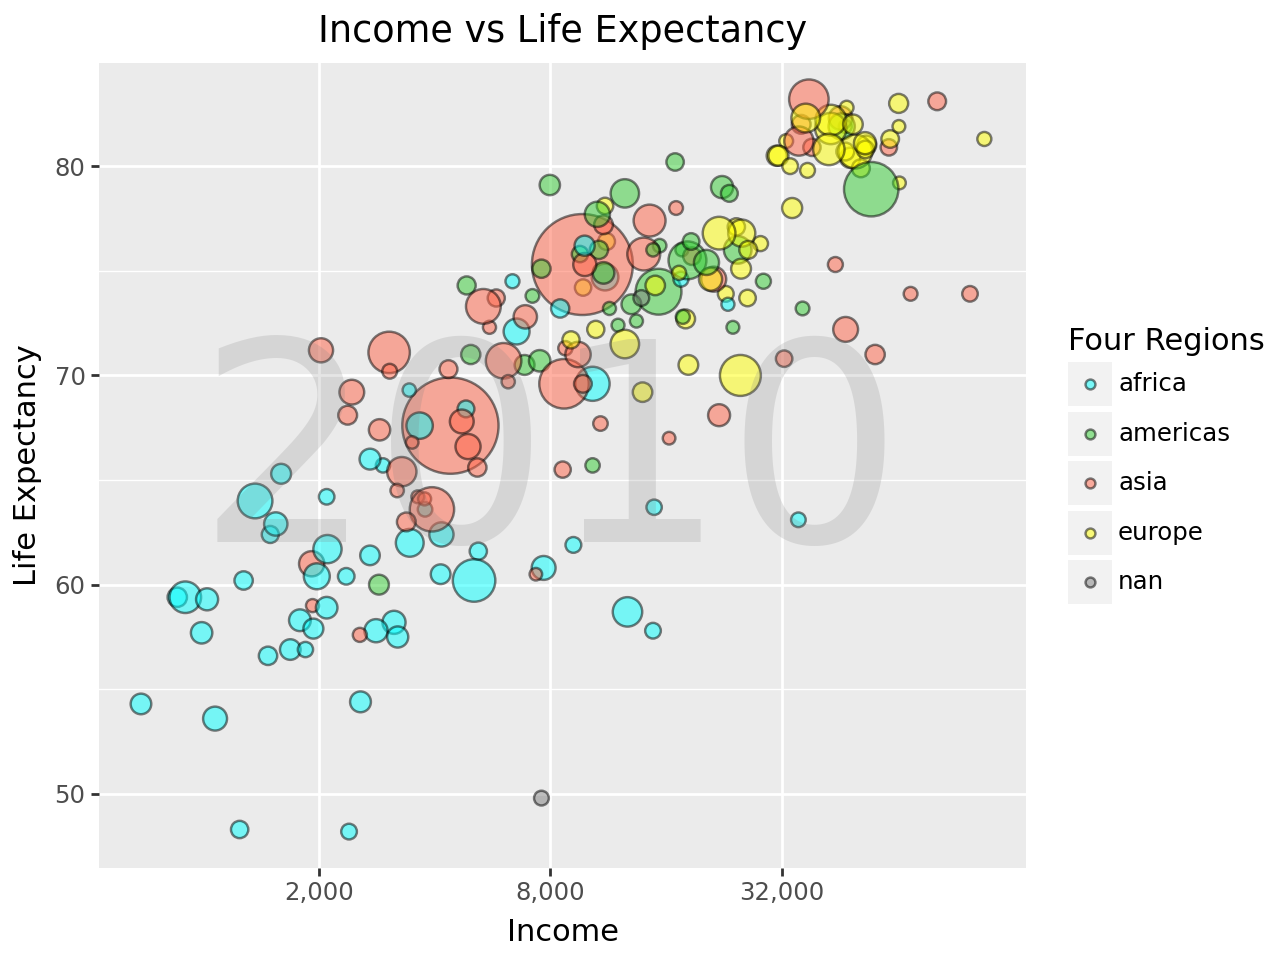

In [33]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme, scale_size_continuous, annotate, scale_x_continuous, scale_fill_manual

# Load the dataset
df = pd.read_csv('/q1data.csv')

# Calculate the midpoint for the x and y axes
x_mid = (df['income'].max() + df['income'].min()) / 2
y_mid = (df['life_exp'].max() + df['life_exp'].min()) / 2

# Create a custom color palette
custom_palette = {
    "asia": "tomato",
    "americas": "limegreen",
    "africa": "cyan",
    "europe": "yellow"
}

# Create a scatterplot with income on the x-axis, life expectancy on the y-axis, and size based on population
scatterplot = (ggplot(df, aes(x='income', y='life_exp', fill='four_regions', size='population')) +
               geom_point(shape='o', color='black', alpha=.5) +  # Filling points with region color and sizing by population
               labs(title="Income vs Life Expectancy",
                    x="Income",
                    y="Life Expectancy",
                    fill="Four Regions") +  # Add the title for the legend
               scale_size_continuous(guide=None) +  # Explicitly remove the size (population) legend
               scale_x_continuous(trans='log2',  # Apply log2 transformation to the x-axis
                                  breaks=[500, 2000, 8000, 32000],  # Custom tick marks with fewer shown
                                  labels=["500", "2,000", "8,000", "32,000"]) +  # Set labels as regular numbers
               scale_fill_manual(values=custom_palette) +  # Apply custom colors for regions
               scale_size_continuous(range=[2, 20]) +  # Adjust size range for the points (2-3 times larger)
               annotate('text', x=8000, y=y_mid, label="2010",
                        size=100, color="gray", alpha=0.2) +  # Add "2010" as a background text
               guides(size=False) +  # Remove the size (energy) legend
               theme(legend_position="right"))  # Position the legend on the right

# Display the plot
print(scatterplot)



## 4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.
After looking at some different charts on the python graph gallery, it seems like the best geometry to be used in this case is the bubble chart. I think it's worse for visualizing this data in certain ways because it cannot scale like the geom_point could and is overall slightly less customizable.

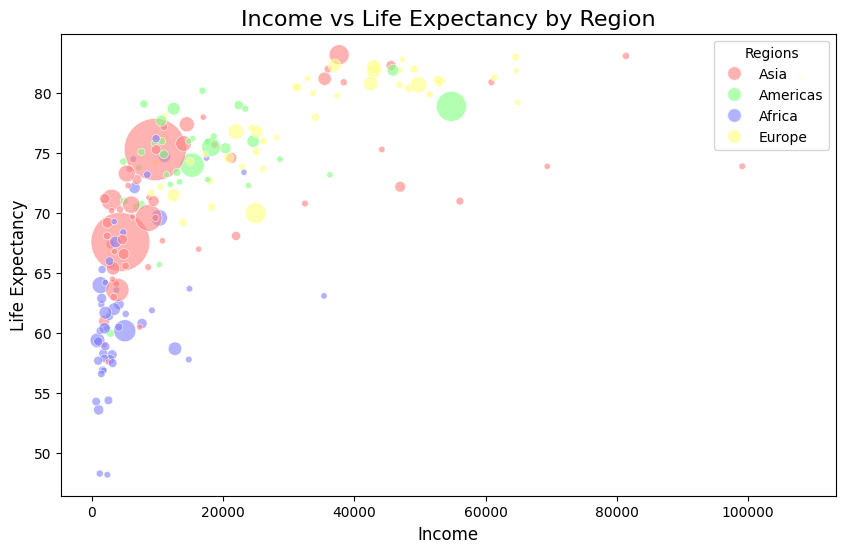

In [36]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# data
data = pd.read_csv('/q1data.csv')

# Define a custom color palette for the four regions
custom_palette = {
    "asia": (1.0, 0.5, 0.5, 0.6),    # Light red with transparency
    "europe": (1.0, 1.0, 0.5, 0.6),  # Light yellow with transparency
    "africa": (0.5, 0.5, 1.0, 0.6),  # Light blue with transparency
    "americas": (0.5, 1.0, 0.5, 0.6)  # Light green with transparency
}

# use the scatterplot function to build the bubble map without a legend
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="income", y="life_exp", size="population",
                hue="four_regions", legend=False, sizes=(20, 2000), palette=custom_palette)

# Add titles and axis labels
plt.title("Income vs Life Expectancy by Region", fontsize=16)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Life Expectancy", fontsize=12)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Asia',
                       markerfacecolor=custom_palette['asia'], markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Americas',
                       markerfacecolor=custom_palette['americas'], markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Africa',
                       markerfacecolor=custom_palette['africa'], markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Europe',
                       markerfacecolor=custom_palette['europe'], markersize=10)]

plt.legend(handles=handles, title='Regions', loc='upper right')

# show the graph
plt.show()



# Task 2




## 1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
Aesthetics: Color is being used to identify each of the four regions. Bubble size is used to identify the energy usage in each country. Each bubble represents a country. The year for this data is 1997.

Variables mapped to each aesthetic: x = 'exports': The variable exports (% of GDP) from the dataset is mapped to the x-axis. y = 'imports': The variable imports (% of GDP) from the dataset is mapped to the y-axis.

## 2. Import the q2data.csv dataset.

Done

## 3. Recreate the plot as best you can using plotnine.


<ipython-input-31-5cbd1a404efc>:35: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 78 rows containing missing values.


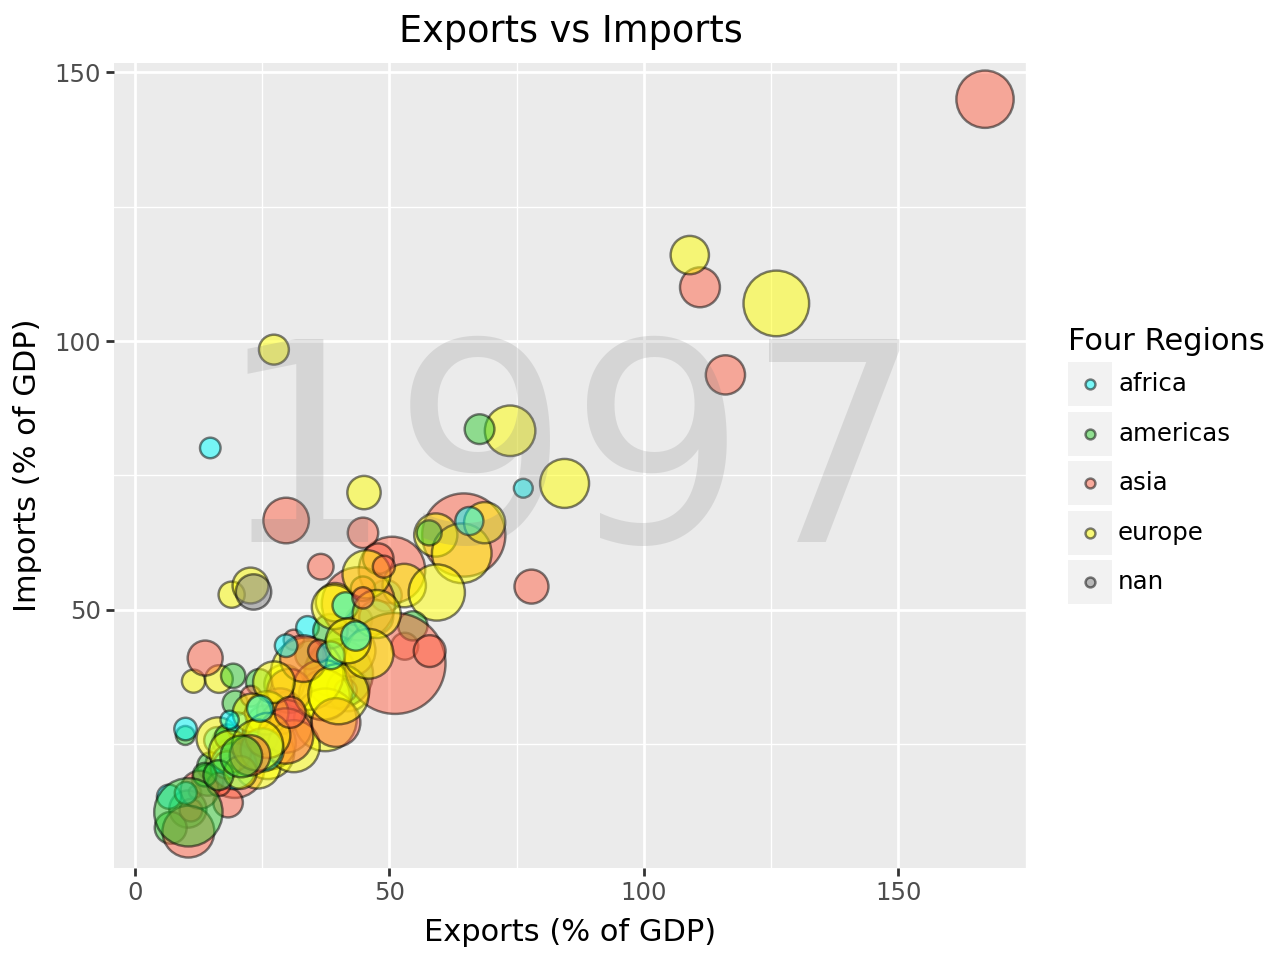

In [31]:
# Import necessary libraries
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme, annotate, scale_fill_manual, guides

# Load the dataset
df = pd.read_csv('/q2data.csv')  # Ensure to use the correct path

# Calculate the middle of the x-axis (exports) and y-axis (imports)
x_mid = (df['exports'].max() + df['exports'].min()) / 2
y_mid = (df['imports'].max() + df['imports'].min()) / 2

# Create a custom color palette for the regions
custom_palette = {
    "asia": "tomato",
    "americas": "limegreen",
    "africa": "cyan",
    "europe": "yellow"
}

# Create a scatterplot with Exports on the x-axis, Imports on the y-axis, and point size based on "energy"
scatterplot = (ggplot(df, aes(x='exports', y='imports', fill='four_regions', size='energy')) +
               geom_point(shape='o', color='black', alpha=.5) +  # Filling points with region color and sizing by "energy"
               labs(title="Exports vs Imports",
                    x="Exports (% of GDP)",
                    y="Imports (% of GDP)",
                    fill="Four Regions") +  # Add the title for the fill legend
               scale_fill_manual(values=custom_palette) +  # Apply custom colors for regions
               scale_size_continuous(range=[2, 20]) +  # Adjust size range for the points (2-3 times larger)
               annotate('text', x=x_mid, y=y_mid, label="1997",
                        size=100, color="gray", alpha=0.2, angle=0) +  # Place watermark at the middle of the x and y axis
               guides(size=False) +  # Remove the size (energy) legend
               theme(legend_position="right"))  # Position the legend on the right

# Display the plot
print(scatterplot)



## 4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.
The best geometry to be used in this case is also the bubble chart.  I think it's worse for visualizing this data in certain ways because it cannot scale like the geom_point could and is overall slightly less customizable.

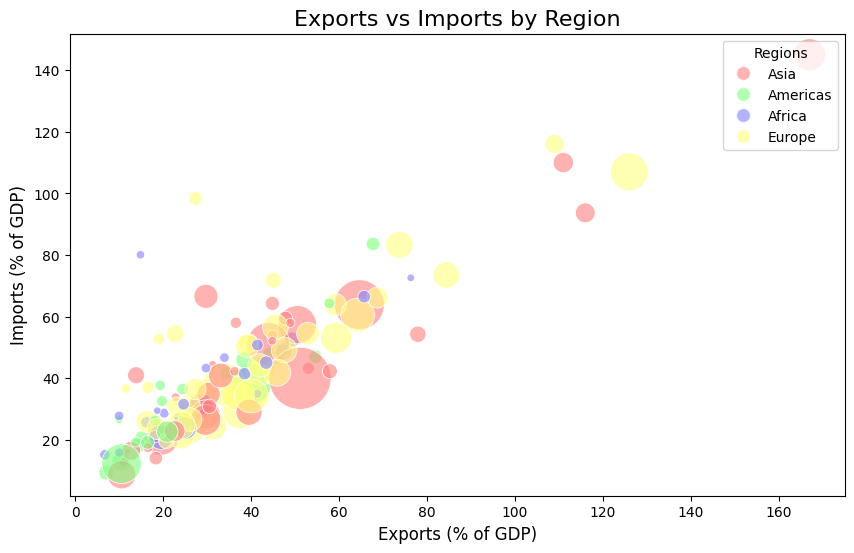

In [ ]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# data
data = pd.read_csv('/content/q2data.csv')  # Make sure to provide the correct path to your CSV file

# Define a custom color palette for the four regions
custom_palette = {
    "asia": (1.0, 0.5, 0.5, 0.6),    # Light red with transparency
    "europe": (1.0, 1.0, 0.5, 0.6),  # Light yellow with transparency
    "africa": (0.5, 0.5, 1.0, 0.6),  # Light blue with transparency
    "americas": (0.5, 1.0, 0.5, 0.6)  # Light green with transparency
}

# use the scatterplot function to build the bubble map without a legend
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="exports", y="imports", size="energy",
                hue="four_regions", legend=False, sizes=(20, 2000), palette=custom_palette)

# Add titles and axis labels
plt.title("Exports vs Imports by Region", fontsize=16)
plt.xlabel("Exports (% of GDP)", fontsize=12)
plt.ylabel("Imports (% of GDP)", fontsize=12)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Asia',
                       markerfacecolor=custom_palette['asia'], markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Americas',
                       markerfacecolor=custom_palette['americas'], markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Africa',
                       markerfacecolor=custom_palette['africa'], markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Europe',
                       markerfacecolor=custom_palette['europe'], markersize=10)]

plt.legend(handles=handles, title='Regions', loc='upper right')

# show the graph
plt.show()


# Task 3




## 1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
Aesthetics: Color is being used to identify each of the four regions. Bubble size is used to identify the average income in each country. Each bubble represents a country. The year for this data is 2001

Variables mapped to each aesthetic: x = 'internet_users': The variable "individuals using the internet" from the dataset is mapped to the x-axis. y = 'gdp': The variable "GDP per capita" from the dataset is mapped to the y-axis.

## 2. Import the q3data.csv dataset.

Done

## 3. Recreate the plot as best you can using plotnine.


<ipython-input-30-5e8d347f93ed>:37: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


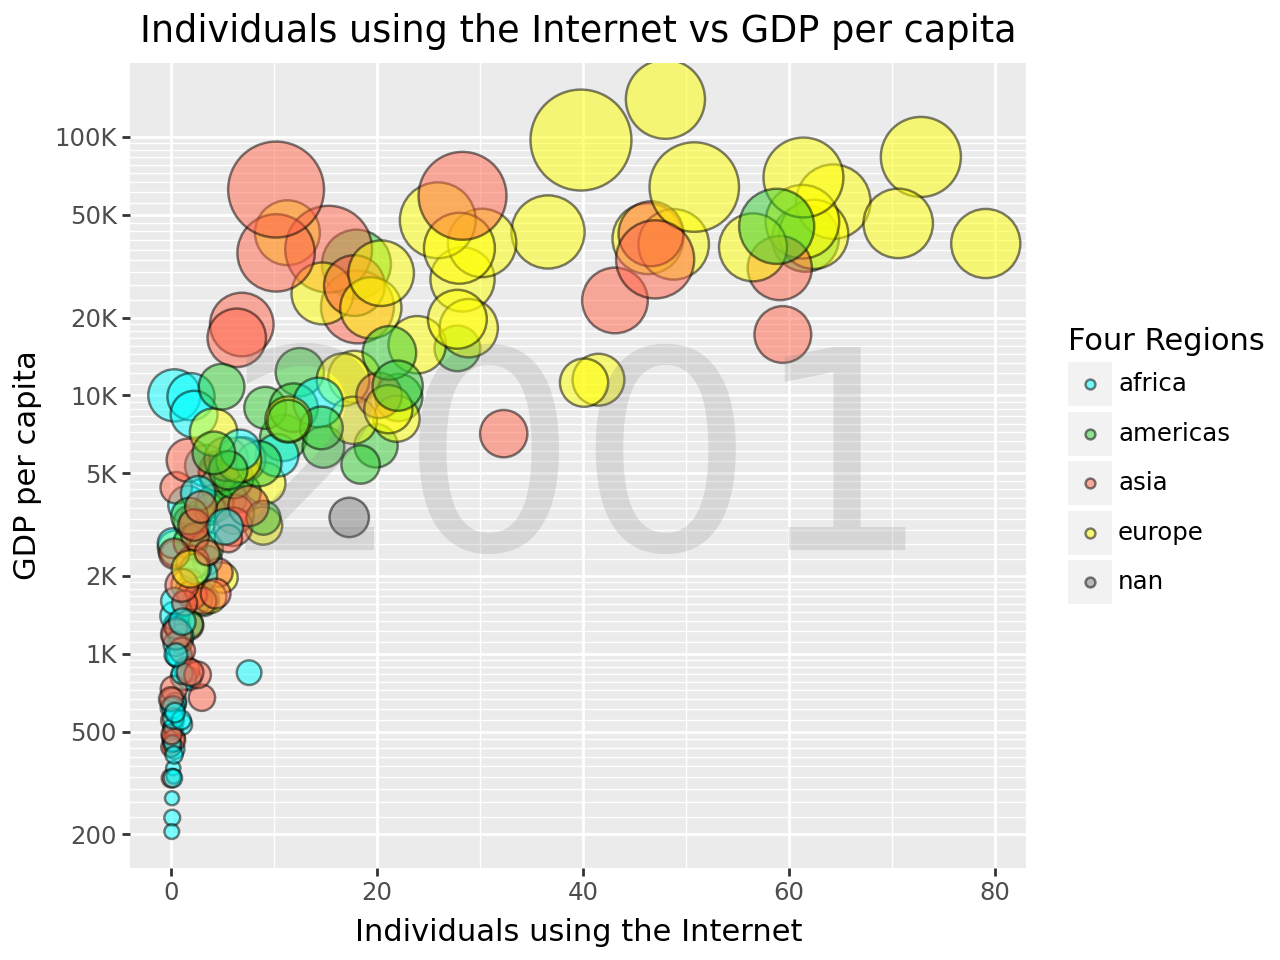

In [30]:
# Import necessary libraries
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme, annotate, scale_fill_manual, scale_y_log10, guides, scale_size_continuous

# Load the dataset
df = pd.read_csv('/q3data.csv')  # Ensure to use the correct path

# Calculate the middle of the x-axis (internet_users) and y-axis (GDP)
x_mid = (df['internet_users'].max() + df['internet_users'].min()) / 2
y_mid = (df['gdp'].max() + df['gdp'].min()) / 2

# Create a custom color palette for the regions
custom_palette = {
    "asia": "tomato",
    "americas": "limegreen",
    "africa": "cyan",
    "europe": "yellow"
}

# Create a scatterplot with internet_users on x-axis, GDP on y-axis, and point size based on "income"
scatterplot = (ggplot(df, aes(x='internet_users', y='gdp', fill='four_regions', size='income')) +
               geom_point(shape='o', color='black', alpha=.5) +  # Filling points with region color and sizing by "income"
               labs(title="Individuals using the Internet vs GDP per capita",
                    x="Individuals using the Internet",
                    y="GDP per capita",
                    fill="Four Regions") +  # Add the title for the fill legend
               scale_fill_manual(values=custom_palette) +  # Apply custom colors for regions
               scale_y_log10(breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],  # Set breaks
                             labels=['200', '500', '1K', '2K', '5K', '10K', '20K', '50K', '100K']) +  # Regular notation
               scale_size_continuous(range=[2, 20]) +  # Adjust size range for the points (2-3 times larger)
               annotate('text', x=x_mid, y=5000, label="2001",
                        size=100, color="gray", alpha=0.2, angle=0) +  # Place watermark at the middle of the x and y axis
               guides(size=False) +  # Remove the size (income) legend
               theme(legend_position="right"))  # Position the legend on the right

# Display the plot
print(scatterplot)



## 4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.
The best geometry to be used in this case is also the bubble chart.  I think it's worse for visualizing this data in certain ways because it cannot scale like the geom_point could and is overall slightly less customizable.

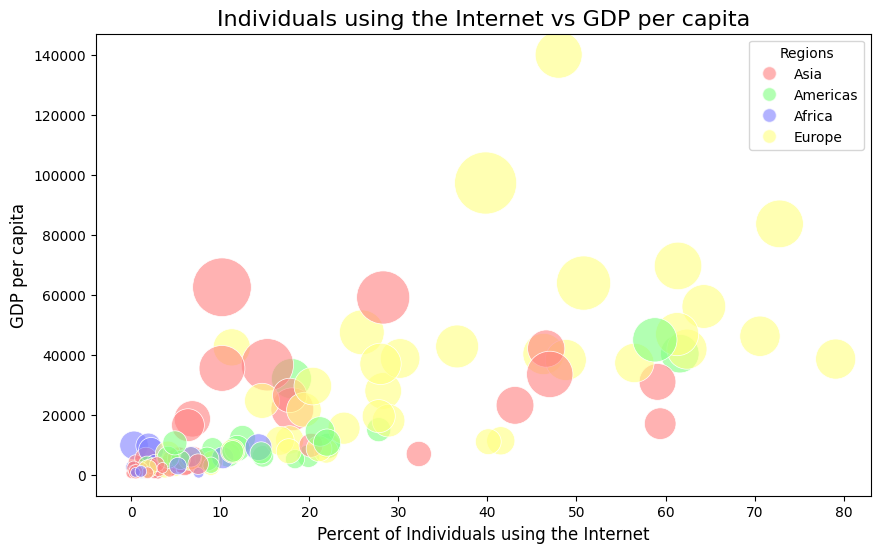

In [ ]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# data
data = pd.read_csv('/q3data.csv')  # Make sure to provide the correct path to your CSV file

# Define a custom color palette for the four regions
custom_palette = {
    "asia": (1.0, 0.5, 0.5, 0.6),    # Light red with transparency
    "europe": (1.0, 1.0, 0.5, 0.6),  # Light yellow with transparency
    "africa": (0.5, 0.5, 1.0, 0.6),  # Light blue with transparency
    "americas": (0.5, 1.0, 0.5, 0.6)  # Light green with transparency
}

# use the scatterplot function to build the bubble map without a legend
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="internet_users", y="gdp", size="income",
                hue="four_regions", legend=False, sizes=(20, 2000), palette=custom_palette)

# Add titles and axis labels
plt.title("Individuals using the Internet vs GDP per capita", fontsize=16)
plt.xlabel("Percent of Individuals using the Internet", fontsize=12)
plt.ylabel("GDP per capita", fontsize=12)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Asia',
                       markerfacecolor=custom_palette['asia'], markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Americas',
                       markerfacecolor=custom_palette['americas'], markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Africa',
                       markerfacecolor=custom_palette['africa'], markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Europe',
                       markerfacecolor=custom_palette['europe'], markersize=10)]

plt.legend(handles=handles, title='Regions', loc='upper right')

# show the graph
plt.show()


Most code provided by ChatGPT 3.5/4

